In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
#library made from the last activity 
import distributions
import math

In [2]:
#getting the dataset
fname = 'results.csv'
data = pd.read_csv(fname)

In [3]:
#seeing the columns of the dataset
data

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
40940,2019-09-10,France,Andorra,3,0,UEFA Euro qualification,Paris,France,False
40941,2019-09-10,Moldova,Turkey,0,4,UEFA Euro qualification,Chișinău,Moldova,False
40942,2019-09-18,DR Congo,Rwanda,2,3,Friendly,Kinshasa,DR Congo,True
40943,2019-09-29,Bangladesh,Bhutan,4,1,Friendly,Dhaka,Bangladesh,False


In [4]:
data.isna().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

In [5]:
#checking the dimensions of the dataset
data_shape = data.shape

print("Columns: ", data_shape[0])
print("Rowss: ", data_shape[1])

Columns:  40945
Rowss:  9


In [6]:
#making a new column with the total number of goals per match
data['total_goals'] = data.home_score + data.away_score

In [7]:
#adding a column of the year the math was played
data['year'] = data.date.str.slice(start=0,stop=4).astype(int)

In [8]:
data_perday = data.copy()
data_permonth = data.copy()
data_peryear = data.copy()

In [9]:
#getting a new data where the resister is the number of goals by how many goals was scored by match in all the history
data2 = data.groupby('total_goals').count().reset_index().copy()
data2.head()

,total_goals,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year
0,0,3346,3346,3346,3346,3346,3346,3346,3346,3346,3346
1,1,7029,7029,7029,7029,7029,7029,7029,7029,7029,7029
2,2,9147,9147,9147,9147,9147,9147,9147,9147,9147,9147
3,3,8051,8051,8051,8051,8051,8051,8051,8051,8051,8051
4,4,5698,5698,5698,5698,5698,5698,5698,5698,5698,5698


In [10]:
#seeing the number of goals by class
data.groupby('total_goals').count().date

total_goals
0     3346
1     7029
2     9147
3     8051
4     5698
5     3494
6     1908
7     1051
8      542
9      298
10     147
11      81
12      56
13      28
14      14
15      12
16      11
17       9
18       8
19       5
20       4
21       1
22       2
24       1
30       1
31       1
Name: date, dtype: int64

In [11]:
#seing the total goals
data.total_goals

0        0
1        6
2        3
3        4
4        3
        ..
40940    3
40941    4
40942    5
40943    5
40944    0
Name: total_goals, Length: 40945, dtype: int64

In [12]:
#actually we only need the columns total goals and dates, because we are analyzing the total goals per match

In [13]:
data = data[["total_goals","date"]]
data2 = data2[["total_goals","date"]]

In [14]:
data.head()
#date represents the date they played

,total_goals,date
0,0,1872-11-30
1,6,1873-03-08
2,3,1874-03-07
3,4,1875-03-06
4,3,1876-03-04


In [15]:
data2.head()
#here date reprents how many dates a total of goals is repited

,total_goals,date
0,0,3346
1,1,7029
2,2,9147
3,3,8051
4,4,5698


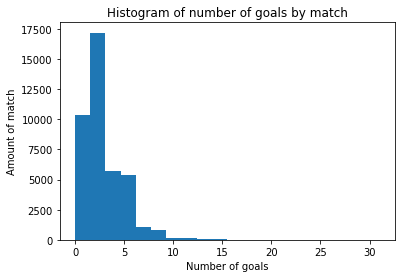

In [16]:
#plotting the histogram of the number of goals
plt.hist(data.total_goals, bins = 20)
plt.ylabel("Amount of match")
plt.xlabel("Number of goals")
plt.title("Histogram of number of goals by match")
plt.show()

### Conclusion:
It does fit like a poisson distribution

## Grouping by day

In [17]:
#making a new column day
data_perday["day"] = data_perday.date.str.slice(start = 8)

In [18]:
data_perday.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,total_goals,year,day
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,0,1872,30
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,6,1873,08
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,3,1874,07
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,4,1875,06
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,3,1876,04


In [19]:
#grouping by day and using sum for total_goals
data_perday = data_perday.groupby("day").sum().reset_index(drop = False)

In [20]:
data_perday.head()

,day,home_score,away_score,neutral,total_goals,year
0,01,2056,1467,299.0,3523,2308770
1,02,2256,1503,333.0,3759,2573495
2,03,2277,1564,350.0,3841,2572700
3,04,2160,1506,324.0,3666,2470749
4,05,2544,1653,336.0,4197,2791716


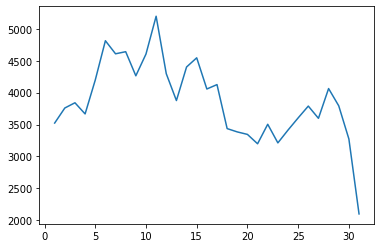

In [21]:
plt.plot(data_perday.day.astype(int), data_perday.total_goals)
plt.show()

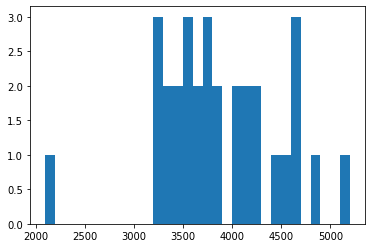

In [22]:
plt.hist(data_perday.total_goals, bins = 31)
plt.show()

### Conclusion:
by day it does not fit like a poisson one

## Grouping by month

In [23]:
data_permonth.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,total_goals,year
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,0,1872
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,6,1873
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,3,1874
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,4,1875
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,3,1876


In [24]:
#making a new column Month
data_permonth["Month"] = data_permonth.date.str.slice(start = 5, stop = 7)

In [25]:
data_permonth.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,total_goals,year,Month
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,0,1872,11
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,6,1873,03
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,3,1874,03
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,4,1875,03
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,3,1876,03


In [26]:
#grouping by month a adding the total_goals by groups
data_permonth = data_permonth.groupby("Month").sum().reset_index(drop = False)

In [27]:
data_permonth.head()

,Month,home_score,away_score,neutral,total_goals,year
0,01,3340,2418,946.0,5758,4395359
1,02,4078,3080,715.0,7158,5099671
2,03,6865,4614,778.0,11479,7994312
3,04,4768,2801,383.0,7569,5008073
4,05,5710,3761,648.0,9471,6411921


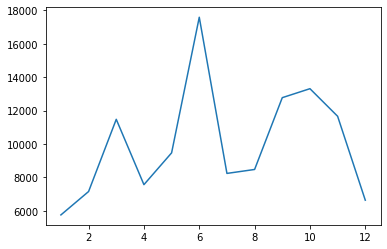

In [28]:
plt.plot(data_permonth.Month.astype(int), data_permonth.total_goals)
plt.show()

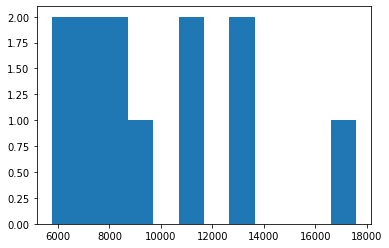

In [29]:
plt.hist(data_permonth.total_goals, bins = 12)
plt.show()

### Conclusion:
This classification does not fit to a poisson distribution

## Grouping by year

In [30]:
data_peryear.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,total_goals,year
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,0,1872
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,6,1873
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,3,1874
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,4,1875
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,3,1876


In [31]:
#grouping by year a adding the total_goals by groups
data_peryear = data_peryear.groupby("year").sum().reset_index(drop = False)

In [32]:
data_peryear.head()

,year,home_score,away_score,neutral,total_goals
0,1872,0,0,0.0,0
1,1873,4,2,0.0,6
2,1874,2,1,0.0,3
3,1875,2,2,0.0,4
4,1876,7,0,0.0,7


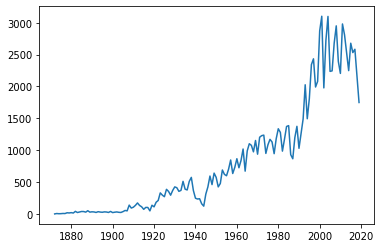

In [33]:
#plotting the plot of group by per year
plt.plot(data_peryear.year.astype(int), data_peryear.total_goals)
plt.show()

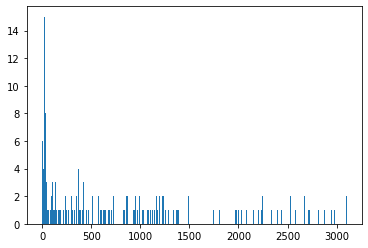

In [34]:
#distribution by year
plt.hist(data_peryear.total_goals, bins = 2*len(data_peryear.year))
plt.show()

### Conclusion:
It Does fit with a poisson distribution, but I consider that per match it is more similar to a poisson for this one and it also is more useful for this anaylisis

## Using total of goal by match

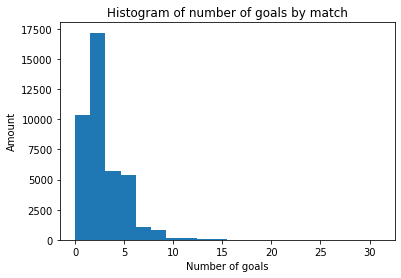

In [35]:
#plotting the histogram of the number of goals
plt.hist(data.total_goals, bins = 20)
#naming the y-axis
plt.ylabel("Amount")
#naming the x-axis
plt.xlabel("Number of goals")
plt.title("Histogram of number of goals by match")
plt.show()

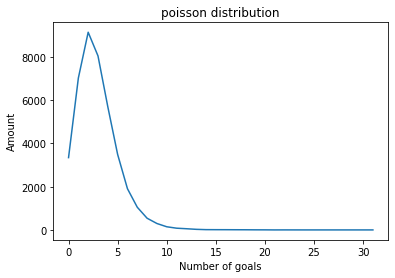

In [36]:
#plotting the distribution of the number of goals
plt.plot(data2.total_goals, data2.date)
plt.title("poisson distribution")
#naming the y-axis
plt.ylabel("Amount")
#naming the x-axis
plt.xlabel("Number of goals")
plt.show()

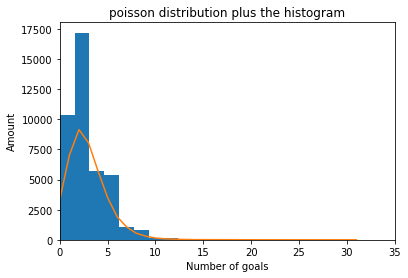

In [37]:
#plotting the distribution using histograms and plot
plt.hist(data.total_goals, bins = 20)
plt.plot(data2.total_goals, data2.date)
plt.title("poisson distribution plus the histogram")
#naming the y-axis
plt.ylabel("Amount")
#naming the x-axis
plt.xlabel("Number of goals")
plt.xlim([0,35])
plt.show()

In [38]:
#getting the lambda value
dimensiones = data.shape   
#It is obtained by multiplying the number of goals per how many times were repited and divided by the sample
lambdavalue = ((data2.total_goals * data2.date).sum())/dimensiones[0]
print("The lambda is: ", lambdavalue)

The lambda is:  2.9339846135059227


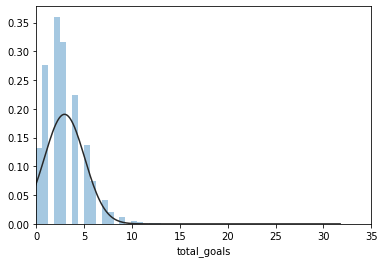

In [39]:
#plotting using sns , using distplot
sns.distplot(data.total_goals, fit = norm, kde = False)
plt.xlim([0,35])
plt.show()

### Moments

In [40]:
#getting the moments
mean = lambdavalue
variance = lambdavalue
print("The first moment is: ",mean)
print("The Second moment is: ",variance)

The first moment is:  2.9339846135059227
The Second moment is:  2.9339846135059227


Using the distribution we made in the last homework we are going to see how the plot will be theorically

# Using the distribution we made in the last homework we are going to make a simulation of a poisson

In [41]:
#size of the sample
shape_data = data.shape

In [42]:
#getting the simulated distribution
sample_data = distributions.poisson(lambdavalue,shape_data[0], 31)

In [43]:
round(lambdavalue)

3.0

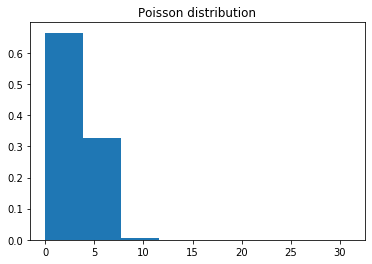

In [44]:
#plotting the histogram of the distribution
plt.hist(sample_data, range = (0,31), bins = 4*int(lambdavalue), weights = [1/shape_data[0]]*shape_data[0])
plt.title("Poisson distribution")
plt.show()

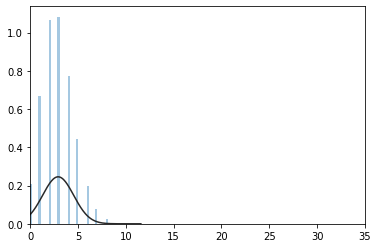

In [45]:
#plotting using sns , using distplot
sns.distplot(sample_data, fit = norm, kde = False)
plt.xlim([0,35])
plt.show()

# Plotting the real probability against the theorical probabilities

In [46]:
def real_poisson(Lambda, n):
    """
    Docstring: function to get the real probability of the poisson
    Input: Lambda is the value of the lambda of the distribution, n is the maximum amount of success
    Output: Return a list of list where the first sublist contain the number of success and the second 
    sublist the probabilities of each one
    """
    p_vals = []
    #loop for getting the probability of each amoun x
    for x in range(n+1):
        #first factor of the numerator
        part_one = math.exp(-Lambda)
        #second factor of the numerator
        part_two = Lambda ** x
        denominator = math.factorial(x)
        #getting the probability using poisson
        p = (part_one * part_two)/denominator 
        p_vals.append(p)
        
    return [list(range(0,n+1)), p_vals]

In [47]:
#making the theorical poisson distribution
real_data = real_poisson(round(lambdavalue), 31)

In [48]:
#maximum number of success
n = 31

### Plotting the theorical points of the probability and n against the real histograms

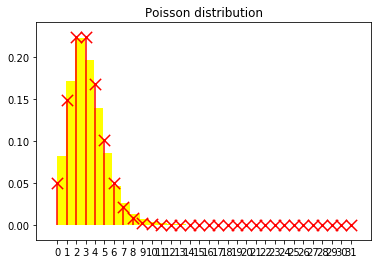

In [49]:
#plotting the histogram without appliyng the normalization, so this is the most representative plot
#maximum likelihood
plt.hist(data.total_goals, bins = n+1, color = 'yellow', weights =[1/shape_data[0]]*shape_data[0])
plt.title("Poisson distribution")
plt.xticks(range(n+1))
#plotting the points of the theorical probability
plt.scatter(real_data[0], real_data[1], color = 'red', zorder = 3, s=128, marker='x')
#plotting lines from the x - axis up to the points of the theorical probability
plt.vlines(real_data[0], 0,real_data[1], color = 'red')
plt.show()

## Making the distribution into a soft one

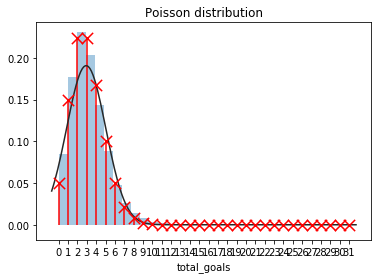

In [50]:
#plotting the histogram using seaborn
#but in this case there is normalization that makes a soft distribution
sns.distplot(data.total_goals, fit =  norm, kde = False, bins = n+1)
plt.title("Poisson distribution")
plt.xticks(range(n+1))
#plotting the points of the theorical probability
plt.scatter(real_data[0], real_data[1], color = 'red', zorder = 3, s=128, marker='x')
#plotting lines from the x - axis up to the points of the theorical probability
plt.vlines(real_data[0], 0,real_data[1], color = 'red')
plt.show()

### Conclusion

As we can see goals by match meets the requieremns to be a poisson distribution, and actually it is quite similar to the theorical one, additionally meets the four points to be a possion distribution
* "x" is the number of ocurrence of an event and it must be integer. 
The number of goals are integers

* The events are independient between them. 
scoring a goal does not mean there will be another goal 

* The rate of events must be constant.
The rate is constant

* Two events cannot happen in the same instant.
In a match cannot be two goals at the same time